# Baseball Analysis
##### By: Praneetha Potiny

##### The data in this analysis was taken from http://www.seanlahman.com/baseball-archive/statistics/

In [1]:
# Let's start by importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import seaborn as sns

### My first question concerning this dataset is:
### 1) What possible factors are correlated with receiving pitcher awards? (excluding relief pitchers)


In [2]:
# I want to look at each kind of award in the dataset

player_awards = pd.read_csv('baseball/AwardsPlayers.csv')

player_awards["awardID"].unique()

array(['Pitching Triple Crown', 'Triple Crown',
       'Baseball Magazine All-Star', 'Most Valuable Player',
       'TSN All-Star', 'TSN Guide MVP',
       'TSN Major League Player of the Year', 'TSN Pitcher of the Year',
       'TSN Player of the Year', 'Rookie of the Year', 'Babe Ruth Award',
       'Lou Gehrig Memorial Award', 'World Series MVP', 'Cy Young Award',
       'Gold Glove', 'TSN Fireman of the Year', 'All-Star Game MVP',
       'Hutch Award', 'Roberto Clemente Award', 'Rolaids Relief Man Award',
       'NLCS MVP', 'ALCS MVP', 'Silver Slugger', 'Branch Rickey Award',
       'Hank Aaron Award', 'TSN Reliever of the Year',
       'Comeback Player of the Year'], dtype=object)

#### It looks like there are a lot of awards here.
####  After looking up which awards have to do with pitching, here is a list of all pitching awards (not specific to relief pitchers):
<li> Pitching Triple Crown </li>
<li> Cy Young Award </li>
<li> TSN Pitcher of the Year </li>

#### Now let's select the rows that contain the appropriate awards and load the data-set containing pitcher stats.

In [3]:
# Get all rows with the appropriate awards
is_pitch = player_awards['awardID'].isin(['Pitching Triple Crown', 'Cy Young Award', 'TSN Pitcher of the Year'])
awarded_pitchers = player_awards[is_pitch][['playerID', 'yearID', 'lgID', 'awardID']]

# Let's get the pitcher stats

pitcher_stats = pd.read_csv('baseball/Pitching.csv')

# Create some new possible variables

pitcher_stats['win%'] = pitcher_stats['W']/pitcher_stats['G']
pitcher_stats['lose%'] = pitcher_stats['L']/pitcher_stats['G']

# Fill NaNs with 0:
pitcher_stats = pitcher_stats.fillna(0)

pitcher_stats.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,HBP,BK,BFP,GF,R,SH,SF,GIDP,win%,lose%
0,bechtge01,1871,1,PH1,0,1,2,3,3,2,...,0.0,0,0.0,0.0,42,0.0,0.0,0.0,0.333333,0.666667
1,brainas01,1871,1,WS3,0,12,15,30,30,30,...,0.0,0,0.0,0.0,292,0.0,0.0,0.0,0.400000,0.500000
2,fergubo01,1871,1,NY2,0,0,0,1,0,0,...,0.0,0,0.0,0.0,9,0.0,0.0,0.0,0.000000,0.000000
3,fishech01,1871,1,RC1,0,4,16,24,24,22,...,0.0,0,0.0,0.0,257,0.0,0.0,0.0,0.166667,0.666667
4,fleetfr01,1871,1,NY2,0,0,1,1,1,1,...,0.0,0,0.0,0.0,21,0.0,0.0,0.0,0.000000,1.000000


### Now we merge the pitcher stats with awards based on the playerID, year, and league

#### * If the player won more than one award in the same year and league, the result contains duplicate rows with the two separate awards

In [4]:
pitcher_stats = pd.merge(pitcher_stats, awarded_pitchers, how='left', on=['playerID', 'yearID', 'lgID'])
pitcher_stats['awardID'] = pitcher_stats['awardID'].fillna('None')

# Let's look at some of the players with awards
pitcher_stats[pitcher_stats['awardID'] != 'None'].head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,BK,BFP,GF,R,SH,SF,GIDP,win%,lose%,awardID
167,bondto01,1877,1,BSN,NL,40,17,58,58,58,...,0,2165.0,0.0,248,0.0,0.0,0.0,0.689655,0.293103,Pitching Triple Crown
568,heckegu01,1884,1,LS2,AA,52,20,75,73,72,...,0,2649.0,2.0,230,0.0,0.0,0.0,0.693333,0.266667,Pitching Triple Crown
649,radboch01,1884,1,PRO,NL,59,12,75,73,73,...,0,2672.0,2.0,216,0.0,0.0,0.0,0.786667,0.160000,Pitching Triple Crown
1152,keefeti01,1888,1,NY1,NL,35,12,51,51,48,...,0,1723.0,0.0,140,0.0,0.0,0.0,0.686275,0.235294,Pitching Triple Crown
1231,clarkjo01,1889,1,BSN,NL,49,19,73,72,68,...,0,2736.0,1.0,280,0.0,0.0,0.0,0.671233,0.260274,Pitching Triple Crown


### Since there's a lot of data, I'll analyze player data during the NL league in the year 2000. With this, we can get a glimpse of how awarded players compare to players that were not awarded.

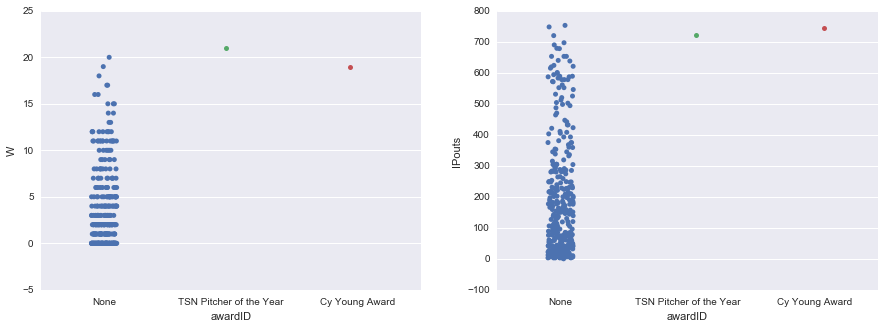

In [5]:
nl_2000 = pitcher_stats.loc[(pitcher_stats['yearID'] == 2000) & (pitcher_stats['lgID'] == 'NL')]

%matplotlib inline

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# These two variables seemed to show the largest difference.
# BFP = Batters Faced By Pitcher
# IPouts = Outs Pitched (innings pitched x 3)
sns.stripplot('awardID', 'W', data=nl_2000, ax=ax1, jitter=True)

sns.stripplot('awardID', 'IPouts', data=nl_2000, ax=ax2, jitter=True)

##### It looks like the awarded players are clearly at the top for these two variables. We can see that the majority of non-awarded players have lower scores in each of the two plots.

### I wanted to analyze all years in the same plot, but I realized that this didn't make sense.
<br>
<li> Players are awarded based on their stats during that league and year. Therefore, if a player had better stats 5 years prior, this shouldn't matter during voting. </li>
<li> With this in mind, I decided to transform all of the data into proportions. Stats would recieve a score of 1 if they were the maximum stat in that year and league. Likewise, they would receive a score of 0 if they were the minimum.</li>
<li> Proportion was calculated with the formula: <b>P = (x-min)/(max-min)</b>, where 'x' is the the data point. Also, for clarification, <b>range is equal to (max-min)</b>. </li> 

In [6]:
# Here, I will create two datasets that contain the range and min, respectively, for each column in their group (year, league).
# Obviously, I only want the continuous (numerical) variables to undergo this change. Therefore, I'm only selecting columns
# 5 to 32

range_data = pitcher_stats.groupby(['yearID', 'lgID'])[pitcher_stats.columns[5:32]].apply(lambda x: x.max() - x.min()).reset_index()
min_data = pitcher_stats.groupby(['yearID', 'lgID'])[pitcher_stats.columns[5:32]].apply(lambda x: x.min()).reset_index()


# Merge the datasets and label all range and min columns with '_R' and '_min', respectively
pitcher_stats = pd.merge(pitcher_stats, range_data, on=['yearID', 'lgID'], suffixes=('', '_R'))
pitcher_stats = pd.merge(pitcher_stats, min_data, on=['yearID', 'lgID'], suffixes=('', '_min'))


# Get all numerical columns that need to be translated
proportion_cols = pitcher_stats.columns[5:32]


# I didn't want to use a for-loop here, but I couldn't find an easier way to apply the function based on the series name
# Here, I'm using the proportion formula above for each data-point in the selected columns
for col in proportion_cols:
    pitcher_stats[col] = (pitcher_stats[col]-pitcher_stats[col+'_min'])/pitcher_stats[col+'_R']
    
    
pitcher_stats = pitcher_stats.fillna(0) # There may be NaNs if the range is 0, therefore I'm filling all of them with 0.
pitcher_stats = pitcher_stats[pitcher_stats.columns[:33]] # Selecting the columns from the original dataset
    
pitcher_stats.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,BK,BFP,GF,R,SH,SF,GIDP,win%,lose%,awardID
0,bechtge01,1871,1,PH1,0,0.052632,0.117647,0.064516,0.09375,0.064516,...,0.0,0.0,0.0,0.116022,0.0,0.0,0.0,0.333333,0.666667,None
1,brainas01,1871,1,WS3,0,0.631579,0.882353,0.935484,0.93750,0.967742,...,0.0,0.0,0.0,0.806630,0.0,0.0,0.0,0.400000,0.500000,None
2,fergubo01,1871,1,NY2,0,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.024862,0.0,0.0,0.0,0.000000,0.000000,None
3,fishech01,1871,1,RC1,0,0.210526,0.941176,0.741935,0.75000,0.709677,...,0.0,0.0,0.0,0.709945,0.0,0.0,0.0,0.166667,0.666667,None
4,fleetfr01,1871,1,NY2,0,0.000000,0.058824,0.000000,0.03125,0.032258,...,0.0,0.0,0.0,0.058011,0.0,0.0,0.0,0.000000,1.000000,None


### Now every continuous variable is written as a proportion for their respective year and league.

#### I want an overview of the data with the same variables as before. However, I want to analyze both the entire data-set and the data-set for only years greater than or equal to 1967.
#### This is because, on the wikipedia page concerning the Cy Young Award. The award was given to one person from each league starting in 1967 (https://en.wikipedia.org/wiki/Cy_Young_Award)

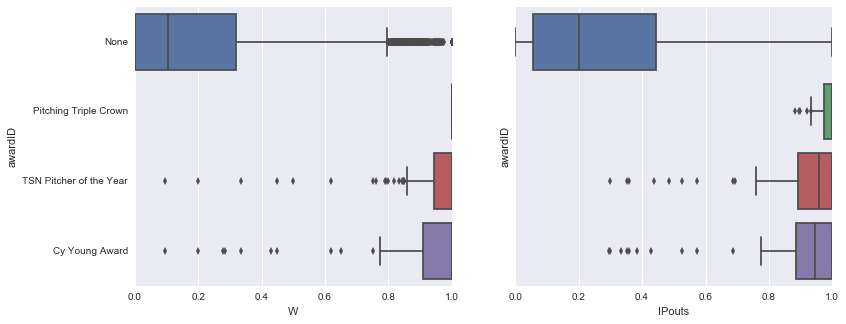

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12.5, 5))

sns.boxplot('W', 'awardID', data=pitcher_stats, ax=ax1)
sns.boxplot('IPouts', 'awardID', data=pitcher_stats, ax=ax2)

#### It seems like most award-winning players had a higher amount of wins and innings pitched for that year and league. 

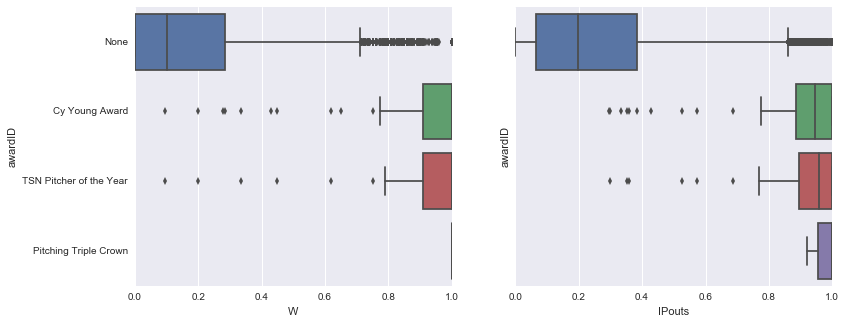

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12.5, 5))

sns.boxplot('W', 'awardID', data=pitcher_stats.loc[(pitcher_stats['yearID'] >= 1967)], ax=ax1)
sns.boxplot('IPouts', 'awardID', data=pitcher_stats.loc[(pitcher_stats['yearID'] >= 1967)], ax=ax2)

#### As expected, many data points in the 'None' category became outliers after only selecting data from the year 1967 and later. Now I want to figure out the reason for all of the outliers in the above plots. 
#### After looking at some rows in the data-set containing IPouts greater than or equal to 0.8, I could see that there was a large difference between the 'R' (or runs) for awarded pitchers compared to non-awarded pitchers. Let's look at the general trend between 'R' and 'IPouts' for each award category.

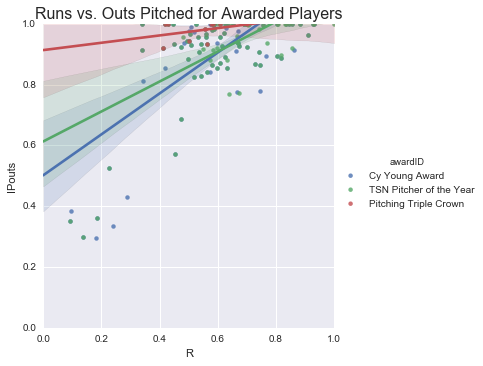

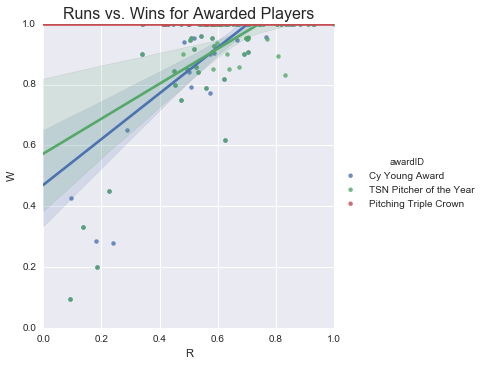

In [9]:
sns.lmplot(x='R', y='IPouts', hue='awardID', data=pitcher_stats.loc[(pitcher_stats['yearID'] >= 1967)\
                                                                    & (pitcher_stats['awardID'] != 'None')])

plt.ylim(0, 1)
plt.xlim(0, 1)
plt.title('Runs vs. Outs Pitched for Awarded Players', fontsize=16)

sns.lmplot(x='R', y='W', hue='awardID', data=pitcher_stats.loc[(pitcher_stats['yearID'] >= 1967)\
                                                                    & (pitcher_stats['awardID'] != 'None')])
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.title('Runs vs. Wins for Awarded Players', fontsize=16)

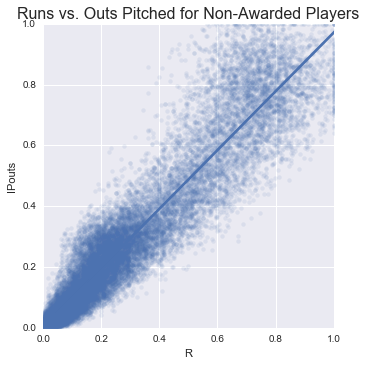

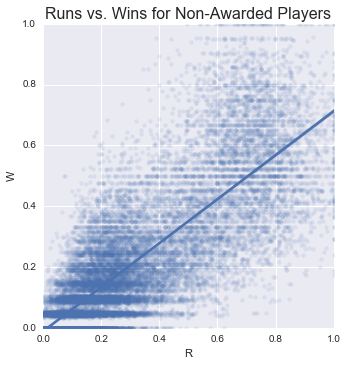

In [10]:
sns.lmplot(x='R', y='IPouts', data=pitcher_stats.loc[(pitcher_stats['yearID'] >= 1967)\
                                                     & (pitcher_stats['awardID'] == 'None')], scatter_kws={'alpha':0.1})
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.title('Runs vs. Outs Pitched for Non-Awarded Players', fontsize=16)

sns.lmplot(x='R', y='W', data=pitcher_stats.loc[(pitcher_stats['yearID'] >= 1967)\
                                                     & (pitcher_stats['awardID'] == 'None')], scatter_kws={'alpha':0.1})
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.title('Runs vs. Wins for Non-Awarded Players', fontsize=16)

#### It seems like some of the data points for non-awarded players crosses over into the awarded players section. However, it's hard to look at the separation from these two graphs. What we can tell is that most awarded players seem to have a low proportion of runs and a high proportion of IPouts, compared to that of non-awarded players
#### Let's create a plot that better visualizes the densities of awarded and non-awarded players.
<br>

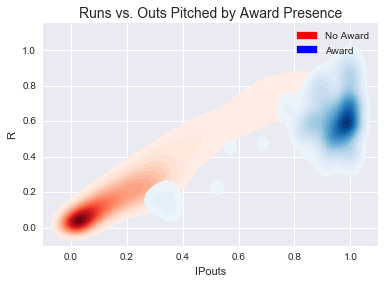

In [11]:
ax = sns.kdeplot(pitcher_stats.loc[(pitcher_stats['yearID'] >= 1967) & (pitcher_stats['awardID'] == 'None')]['IPouts'],\
                 pitcher_stats.loc[(pitcher_stats['yearID'] >= 1967) & (pitcher_stats['awardID'] == 'None')]['R'],\
                 n_levels=30, cmap="Reds", label='award', shade=True, shade_lowest=False)
ax = sns.kdeplot(pitcher_stats.loc[(pitcher_stats['yearID'] >= 1967) & (pitcher_stats['awardID'] != 'None')]['IPouts'],\
                 pitcher_stats.loc[(pitcher_stats['yearID'] >= 1967) & (pitcher_stats['awardID'] != 'None')]['R'],\
                 n_levels=30, cmap="Blues", label='no award', shade=True, shade_lowest=False)


# Need to manually create legend because the densities were plotted separately
no_award = mpatches.Patch(color='red', label='No Award')
award = mpatches.Patch(color='blue', label='Award')
red = plt.legend(handles = [no_award], bbox_to_anchor=(1, 1))
plt.legend(handles = [award], bbox_to_anchor=(0.955, 0.935))
plt.gca().add_artist(red)

plt.title('Runs vs. Outs Pitched by Award Presence', fontsize=14)

#### There seems to be some overlap between the variables. However, the most dense parts of the plot are clearly separated from each other. 

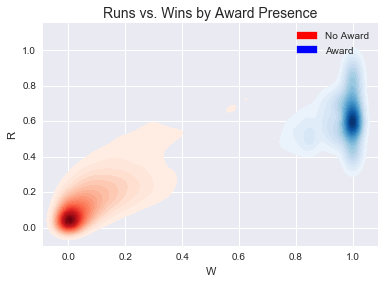

In [12]:
ax = sns.kdeplot(pitcher_stats.loc[(pitcher_stats['yearID'] >= 1967) & (pitcher_stats['awardID'] == 'None')]['W'],\
                 pitcher_stats.loc[(pitcher_stats['yearID'] >= 1967) & (pitcher_stats['awardID'] == 'None')]['R'],\
                 n_levels=30, cmap="Reds", label='award', shade=True, shade_lowest=False)
ax = sns.kdeplot(pitcher_stats.loc[(pitcher_stats['yearID'] >= 1967) & (pitcher_stats['awardID'] != 'None')]['W'],\
                 pitcher_stats.loc[(pitcher_stats['yearID'] >= 1967) & (pitcher_stats['awardID'] != 'None')]['R'],\
                 n_levels=30, cmap="Blues", label='no award', shade=True, shade_lowest=False)

# Plot the legends separately again
red = plt.legend(handles = [no_award], bbox_to_anchor=(1, 1))
plt.legend(handles = [award], bbox_to_anchor=(0.955, 0.935))
plt.gca().add_artist(red)

plt.title('Runs vs. Wins by Award Presence', fontsize=14)

#### It seems like the number of wins is a better variable to use than innings pitched, because the densities are further separated in this plot.

#### Now let's get some statistics on these particular variables

In [13]:
# Here, 'size' refers to count, or the number of rows for each category.

pitcher_stats.loc[(pitcher_stats['yearID'] >= 1967)][['awardID', 'R', 'IPouts', 'W']].groupby('awardID')\
                                .agg([np.size, np.mean, np.median, np.std])

R                                 IPouts  \
                            size      mean    median       std     size   
awardID                                                                   
Cy Young Award              97.0  0.579520  0.585106  0.176211     97.0   
None                     25083.0  0.277114  0.193750  0.247972  25083.0   
Pitching Triple Crown       10.0  0.534493  0.557886  0.093642     10.0   
TSN Pitcher of the Year     93.0  0.615655  0.607692  0.165793     93.0   

                                                             W            \
                             mean    median       std     size      mean   
awardID                                                                    
Cy Young Award           0.892171  0.944993  0.173980     97.0  0.907116   
None                     0.272739  0.198675  0.254740  25083.0  0.189550   
Pitching Triple Crown    0.978250  1.000000  0.032076     10.0  1.000000   
TSN Pitcher of the Year  0.916781  0.956522  0.136100     93.0  0.927598   

                                          
                        median       std  
awardID                                   
Cy Young Award             1.0  0.190441  
None                       0.1  0.218416  
Pitching Triple Crown      1.0  0.000000  
TSN Pitcher of the Year    1.0  0.159262

#### In the above chart, we see some descriptive statistics. Here are some interesting things I noticed:
<li> The mean and median for 'R', 'IPouts', and 'W' is much higher for award categories than non-award categories. </li>
<li> The standard deviation is the largest for the non-award category. This could be a result of having much more data for players that did not win an award </li>
<li> The 'Pitching Triple Crown' has the lowest count and standard deviation. However, this could be because we removed data from years prior to 1967. The award is given out infrequently. It also has the best mean and median scores for 'R', 'IPouts', and 'W'.</li>

### Conclusion:
<p> From the two density plots above, we can see that there is a separation between the award and non-award groups when analyzing 'runs vs. outs pitched' and 'runs vs. wins'. </p>
<li>This implies that players tend to have the highest wins and innings pitched along with an average number of runs for their respective league and year if they win an award </li>.
<li>It also implies that players tend to have a very low number of runs, wins, and innings pitched if they did not win an award during that year and league.</li>
<li>It seems to be difficult to predict what kind of award will be given out. The difference between players with 'Cy Young' award and the 'TSN Pitcher of the Year' award seems to be the most difficult to assess.
<p> During this study, I came across some limitations such as having repeated rows for players who won twice in year and league. This could skew the statistics of winning players. I was also limited by the fact that the amount and conditions during which an award was given out changed over the years. For example, as I said earlier, the Cy Young Award was given to two players each year for their corresponding league starting in 1967. The award itself, is also relatively new. In 1956, it was introduced in honor of the baseball player, "Cy" young, who died the year before. This is why I was not able to use all of the data available in the data-set.</p>